# Redes
## Josué Juárez
----

Son conexiones entre un conjunto $V$ de nodos mediante enlaces ($E$). La interpretación de la red depende de la naturaleza de lo que se este representando, por ejemplo, si los nodos representan los alumnos de una escuela y de alguna forma se establece el si hay conexiones entre personas, la red permitiria visualizar comunidades de individuos que hay en la escuela, asi como también los posibles individuos conectados a mas de una comunidad.

Los enlaces pueden estar o no dirigidos entre cada nodo (redes dirigidas o no dirigidas). En una red (social) de Facebook la conexión entre dos personas se establece mediante la solicitud de amistad, por lo que la conexión existe desde la perspectiva de cualquiera de las dos personas. A diferencia de una red de Twitter donde las conexiones son establecidas a la hora de seguir a un usuario pero esta no necesariamente es recíproca.

Los enlacens pueden tambien tener pesos, por ejemplo, la conexión entre dos personas puede ser más fuerte dependiendo del número de amigos en común.

Existen cantidades cuantitativas que dan descripciones acerca de la estructura de una red. Para más información sobre estas cantidades pueden consultarse las referencias [1, 2, 3, 4].

# Representación de redes

Una primera forma algo primitiva de representar una red es especificando las conexiones explicitamente.

**Ejemplo** El conjunto de nodos ó vertices $V = \{1 , 2, 3, 4, 5\}$ estan relacionados por las conexiones $E = \{ \{1,2\}, \{1,3\}, \{1,5\}, \{2,3\}, \{2,5\}, \{3,4\}, \{4,5\}\}$. Los conjuntos $V$ y $E$ representan una red digirida (existe la conexión $ \{1,2\}$, peo no $\{2,1\}$ por ejemplo.)


La primera desventaja de esta representación es que no es muy buena para un gran número de nodos y muchas conexiones.

## Matriz de adyacencia

Una forma más ventajosa de manejar las conexiones son mediante una matriz. Todas las posibles conexiones de una red pueden introducirse en una matriz $A_{i,j}$ la cual recibe el nombre de matriz de adyacencia. El elemento $(i,j)$ represen la conexión entre el nodo $i$ y $j$. En el caso de una red no dirigida la matriz de adyacencia es una matriz simétrica ($A_{i,j}$ = $A_{j,i}$).

Si hay $|V| = n$ nodos, entonces $dim(A_{i,j}) = n \times n$.

El uso de arreglos matriciales puede simplificar la estructura de el algoritmo para la red.

**Ejemplo** La matriz de adyacencia del ejemplo anterior es

\begin{equation}
A_{i,j} =
\begin{pmatrix}
0 & 0 & 0 & 0 & 0\\
1 & 0 & 0 & 0 & 0\\
1 & 1 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0\\
1 & 1 & 0 & 1 & 0
\end{pmatrix}
\end{equation}

donde el valor de uno significa conexión y cero es ausencia de conexión.
Las conexiones no necesariamente deben tener el valor de uno. En caso de que los elementos que representan conexiones en la matriz $A_{i,j}$ tengan diferentes valores, entonces la matriz de adyacencia representa una red cuyos enlaces tienen pesos.

# igraph

igraph es un una colección de herramientas para el análisis de redes disponible para usarlo con R, Python, C/C++ y Mathematica. Para más referencias ver [5]

La instalación es igual a cualquier otro paquete de R que se descargue de CRAN. O bien para instalarlo desde un entorno jupyter basta con la siguiente linea de código.

In [1]:
# instala el paquete igraph en el entorno de jupyter
#install.packages('igraph', repos='http://cran.us.r-project.org')

## Graficar redes

A continuación se muestran varios ejemplos para hacer las gráficas de las redes con igraph.

**Ejemplo** Para graficar la red del último ejemplo

In [2]:
library(igraph)

red <- graph.formula(1-+2,1-+3,1-+5,2-+3,2-+5,3-+4,4-+5) #crea un objeto de igraph (la red)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



La variable *red* se ha convertido en un objeto de igraph que contiene información de la red.

In [3]:
V(red) #Vértices de la red
E(red) #Enlaces de la red

+ 5/5 vertices, named, from 6d980aa:
[1] 1 2 3 5 4

+ 7/7 edges from 6d980aa (vertex names):
[1] 1->2 1->3 1->5 2->3 2->5 3->4 4->5

Para obtener la gráfica usamos el comando *plot()*

In [ ]:
plot(red)

Podemos cambiar el color y tamaño de los nodos y sus etiquetas especificandolo, asi como el ancho y tamaño de los enlaces en el comando *plot()*.

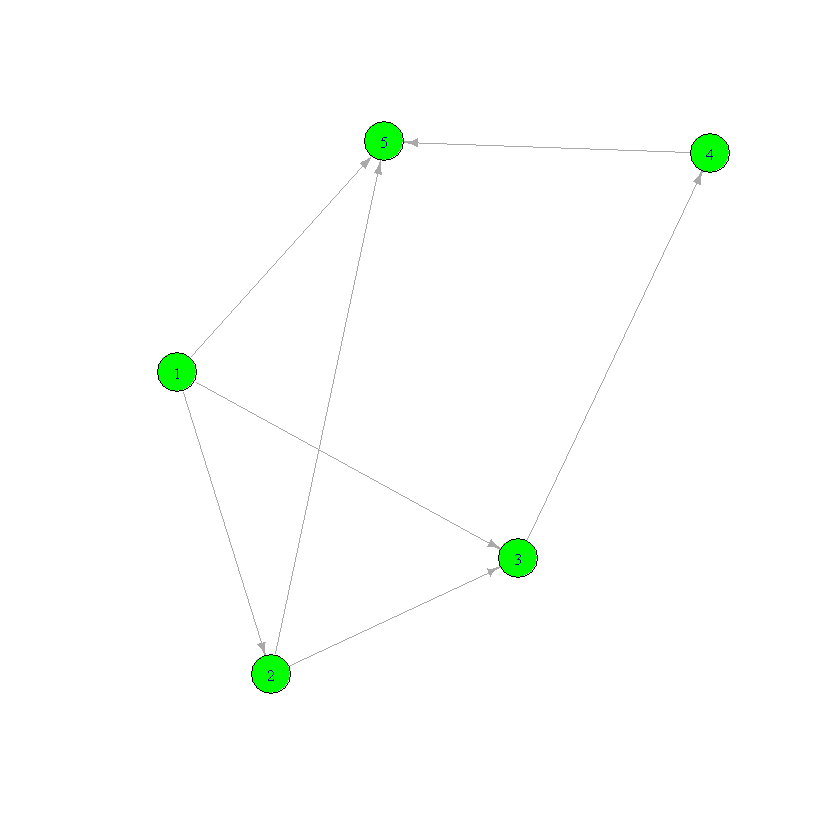

In [4]:
plot(red, vertex.label.cex	= 0.8, edge.width = 1, edge.arrow.size = 0.5, vertex.color="green")

igraph puede construir la red proporcionandole la matriz de adyacencia.

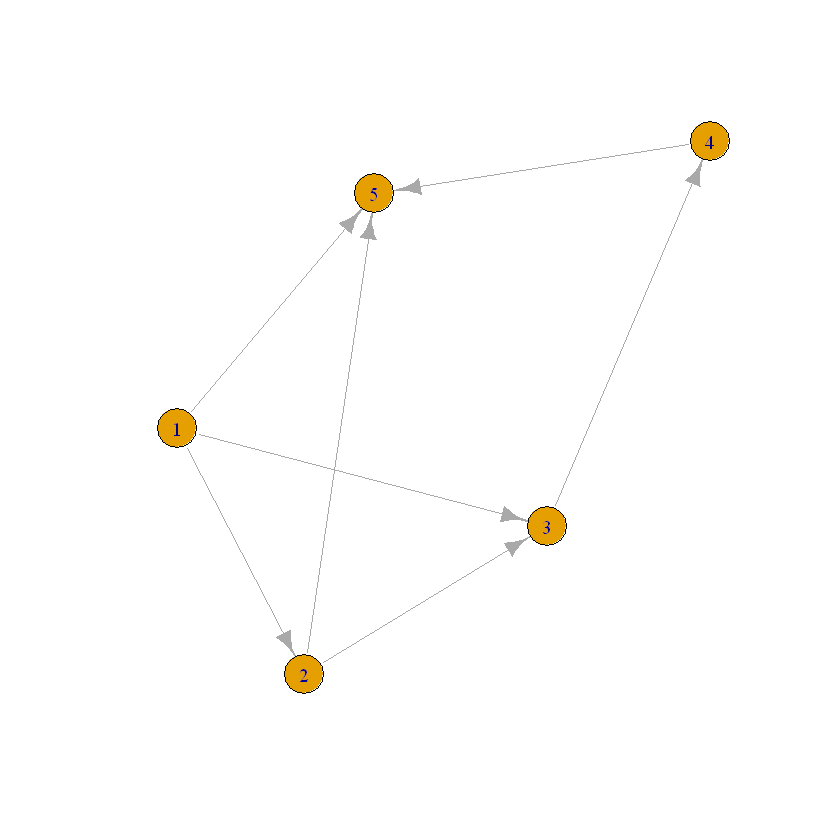

In [5]:
A <- matrix(c(0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,1,0), nrow=5, ncol=5) #matriz de adyacencia
red <- graph_from_adjacency_matrix(A) #objeto de igraph
plot(red)

**Ejemplo** *graph_from_adjacency_matrix(m)*

A pesar que la estructura de una red queda determinada por la matriz de adyacencia completa, igraph tiene opciones para construir la red considerando diferentes partes de la matriz de adyacencia.

El comando *graph_from_adjacency_matrix(m)* funciona dependiendo si el argumento *weighted* es falso o verdadero (para más información ver [6]).
Consideremos la matriz de adyacencia de $7 \times 7$ generada aleatoriamente.

In [6]:
A  <- matrix(c(sample(0:3,49,replace=T)), nrow=7, ncol=7)
A

1,3,0,0,1,3,2
1,1,0,0,2,0,1
2,1,1,0,0,1,3
3,2,3,0,3,2,2
0,1,3,0,1,1,3
2,0,2,3,2,0,2
2,1,0,0,3,0,1


Para el caso de *weighted = 'FALSE'* podemos escoger entre una red dirigida o no dirigida con el argumento *mode*

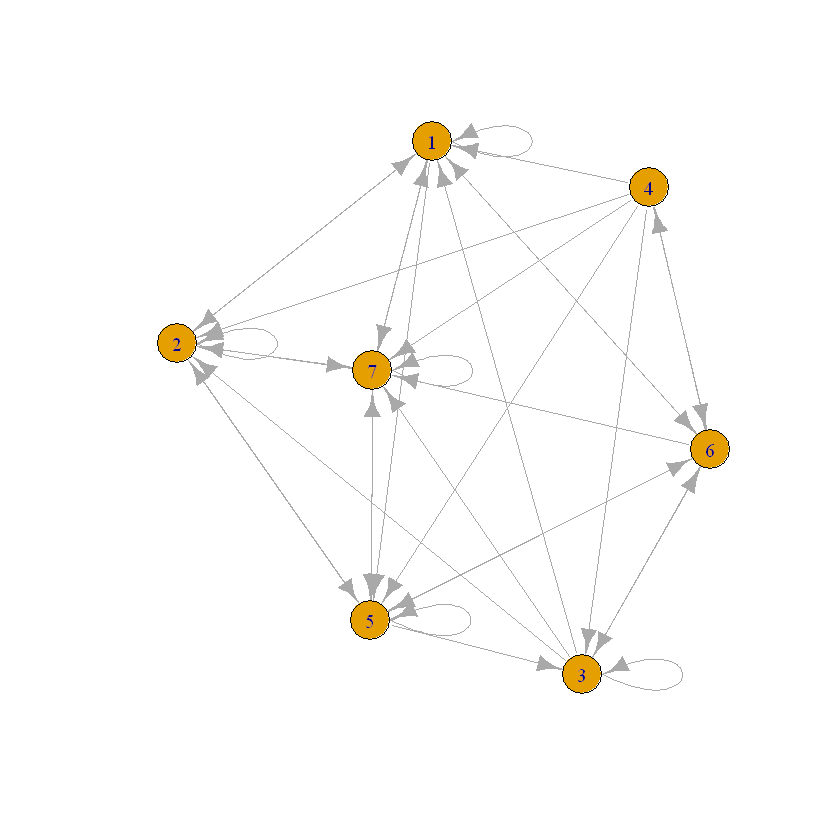

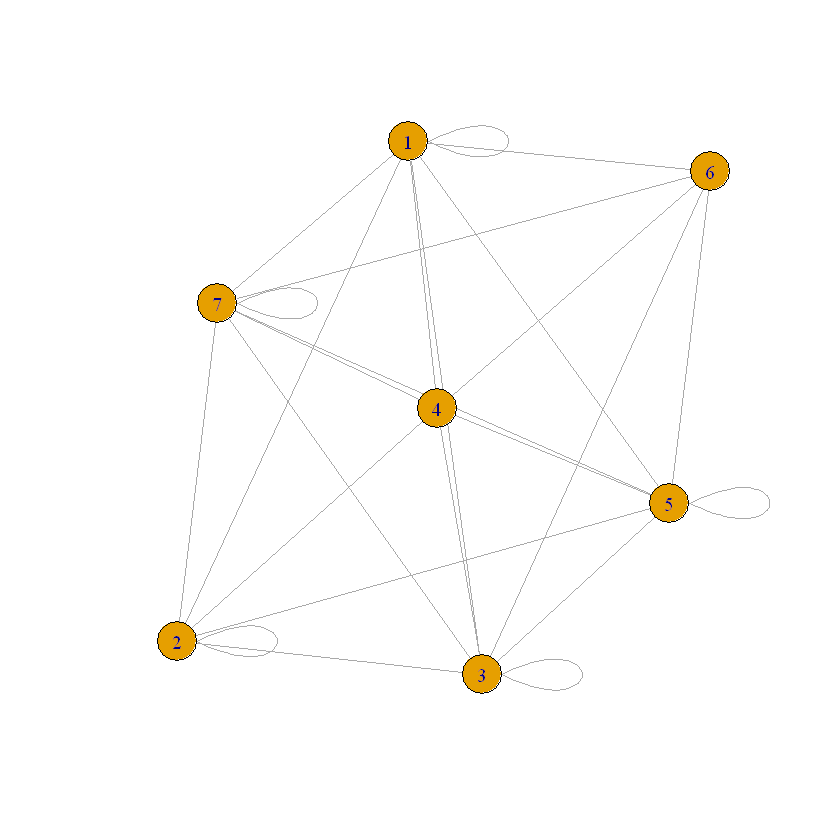

In [7]:
red1 <- graph_from_adjacency_matrix(A, weighted = 'FALSE', mode = 'directed') #Red (sin peso) dirigida
red2 <- graph_from_adjacency_matrix(A, weighted = 'FALSE', mode = 'undirected') #Red (sin peso) no dirigida
plot(red1)
plot(red2)

Para el caso en que *weighted = 'FALSE'* y  *mode = 'undirected'* el enlace es seleccionado entre el elemento máximo $(i,j), (j,i)$ de la matriz (igraph no revisa que la matriz de adyacencia sea simétrica).

Otras formas de crear la red sin peso (*weighted = 'FALSE'*) y no dirigida son escogiendo los enlaces del triángulo superior dereco o inferior izquierdo de la matriz (*mode = 'upper'*, *mode = 'lower'* respectivamente), o bien escogiendo el valor mínimo de $(i,j), (j,i)$ (*mode = 'min'*).

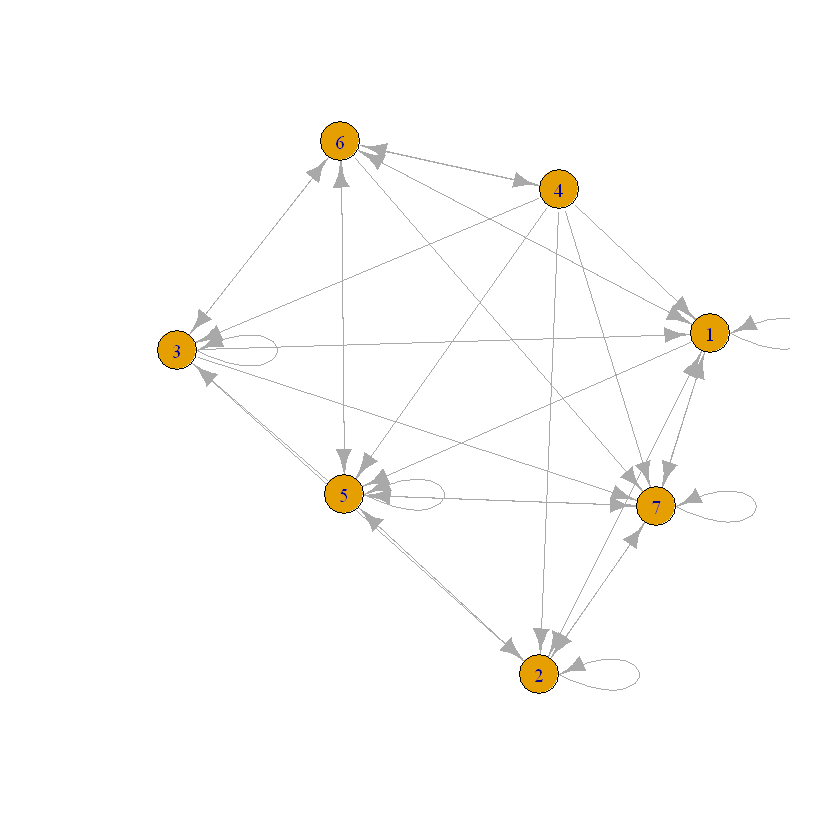

In [8]:
red3 <- graph_from_adjacency_matrix(A, weighted = 'TRUE', mode = 'directed')
plot(red3)

Si lo que queremos es la red con peso no dirigida, el peso del enlace se asigan dependiendo del valor de *mode* (*'undirected', 'max', 'upper', 'lower', 'min', 'plus'*).
 
Es importante saber que si la matriz de adyacencia no es simétrica *mode = 'undirected'* usará los valores del triángulo superior derecho para los enlaces.

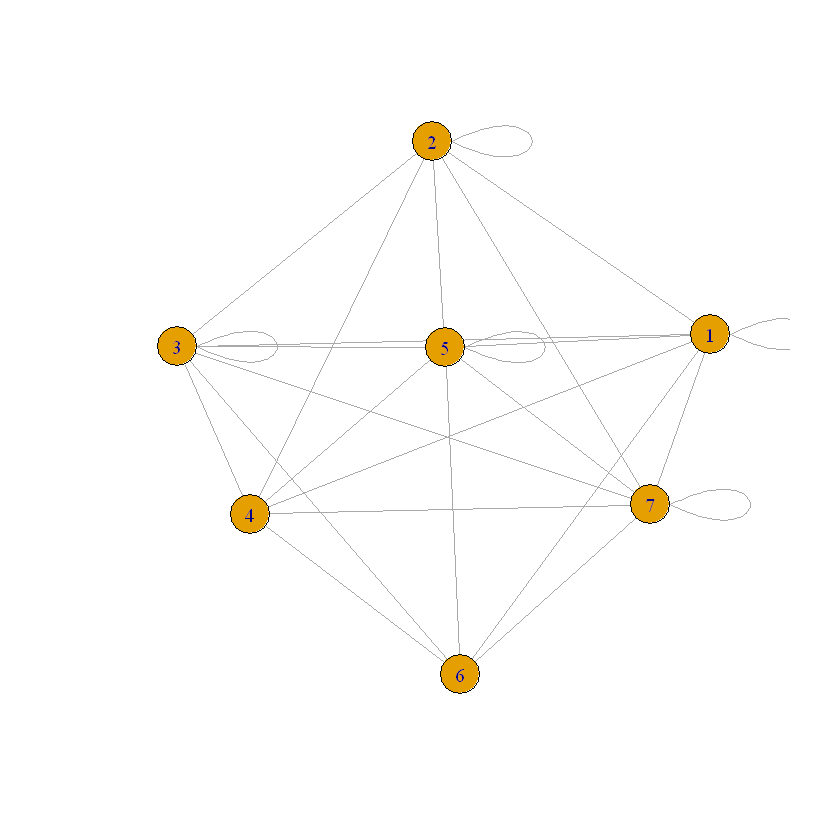

In [9]:
red4 <- graph_from_adjacency_matrix(A, weighted = 'TRUE', mode = 'undirected')
plot(red4)

En la practica las autoconexiones no son consideradas, y los algortimos que crean las matrices de adyacencia tienen la condicion de que $A_{i,j} = 0$ para $i =j$.

En caso de que la diagonal de la matriz de adyacencia tenga entradas diferentes de cero, el argumento *diag = FALSE* asigna el valor de cero a la diagonal a la hora de crear la red.

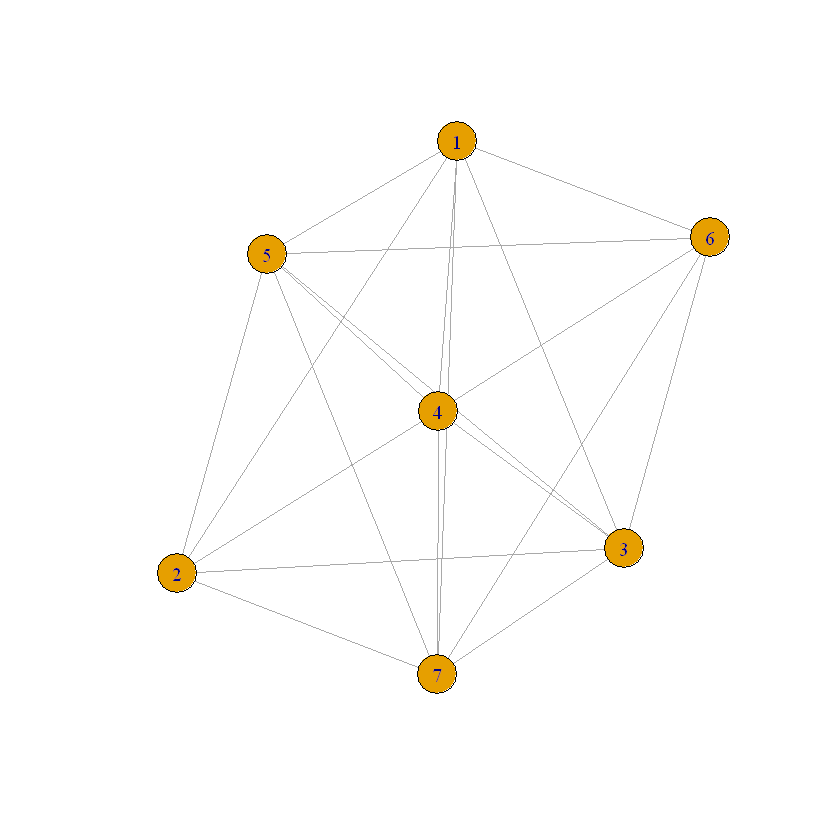

In [10]:
red5 <- graph_from_adjacency_matrix(A, weighted = 'TRUE', mode = 'undirected', diag = FALSE)
plot(red5)

## Representaciones y diseños de la red

La posición de los nodos influye mucho en la información que podamos observar a simple vista de una red. Dependiendo del número de nodos y la estructura de los enlaces algunas representaciones y diseños de la red pueden ser más convenientes que otros.

**Ejemplo** *Algunos diseños*.

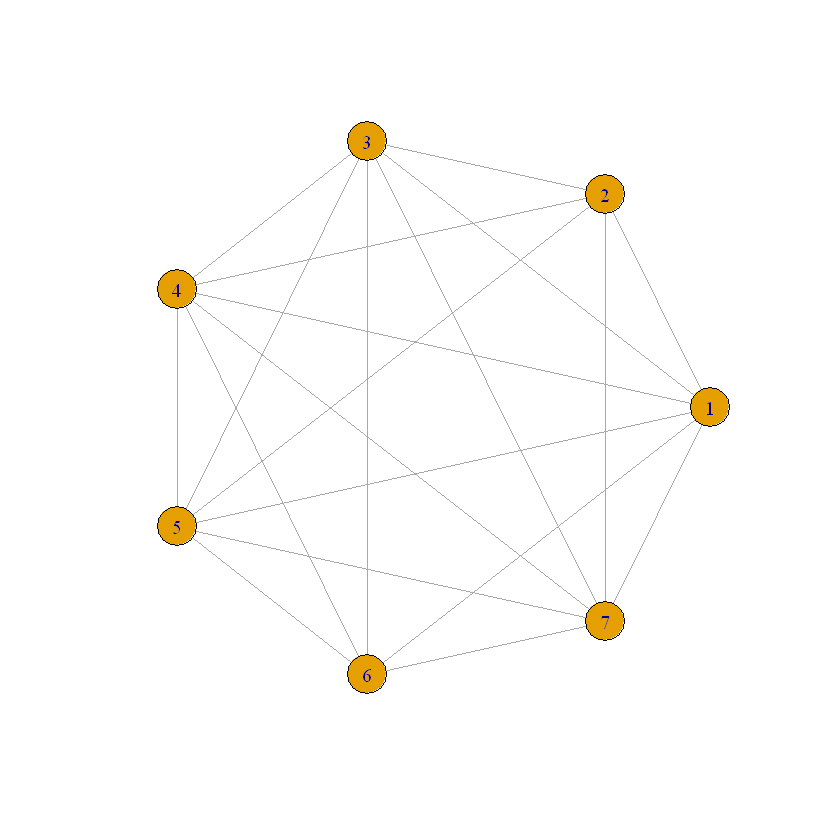

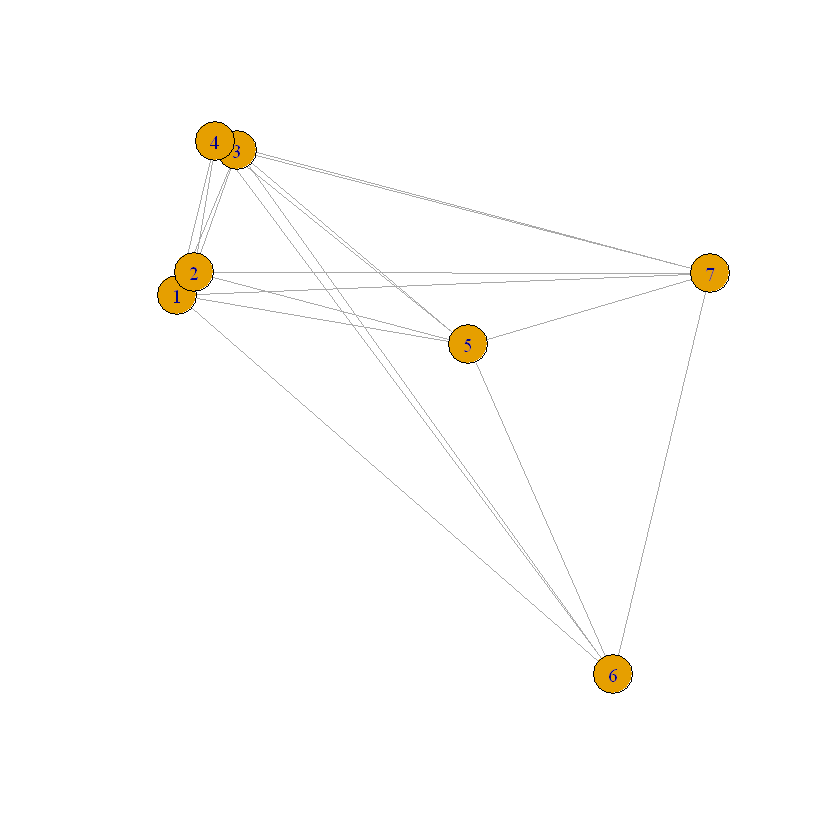

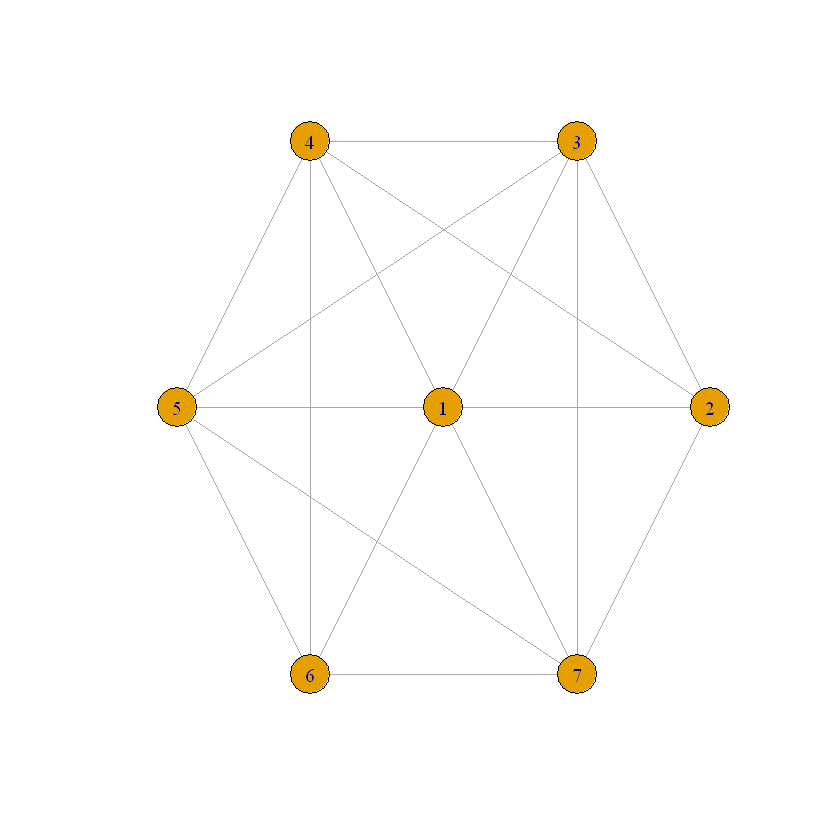

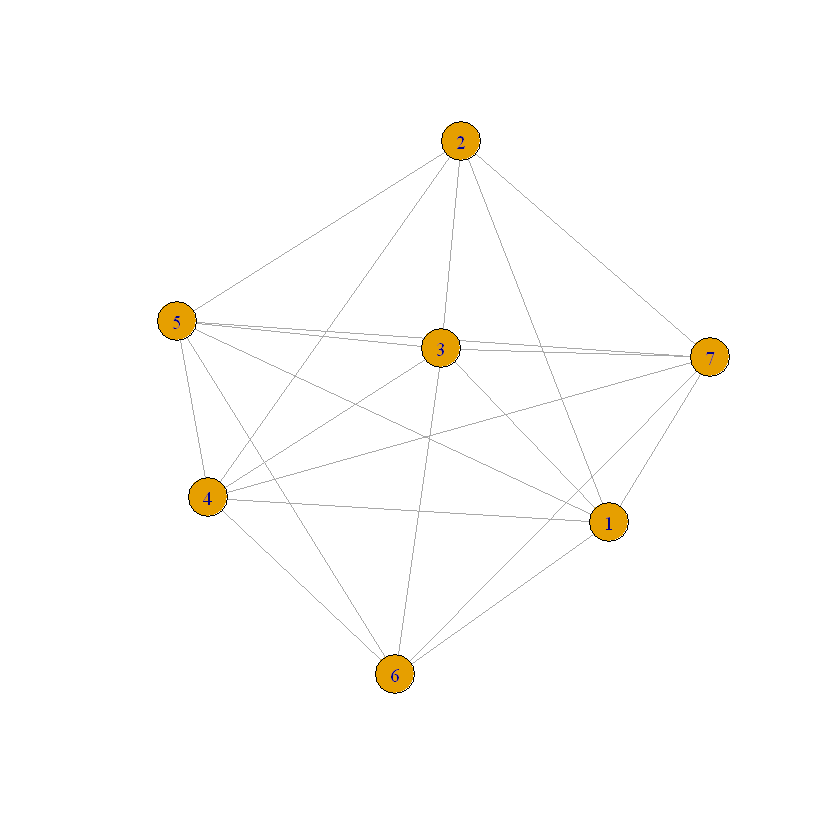

In [11]:
l1 <- layout_in_circle(red5) #los nodos en un arreglo circular
l2 <- layout_randomly(red5) #los nodos colocados aleatoriamente
l3 <- layout_as_star(red5, center = V(red5)[1]) #nodos colocados en forma de estrella con el nodo 1 como centro
l4 <- layout_nicely(red5) #escoge segun ciertos criterios la mejor representación.
plot(red5, layout = l1)
plot(red5, layout = l2)
plot(red5, layout = l3)
plot(red5, layout = l4)    

**Ejemplo** *Árboles*

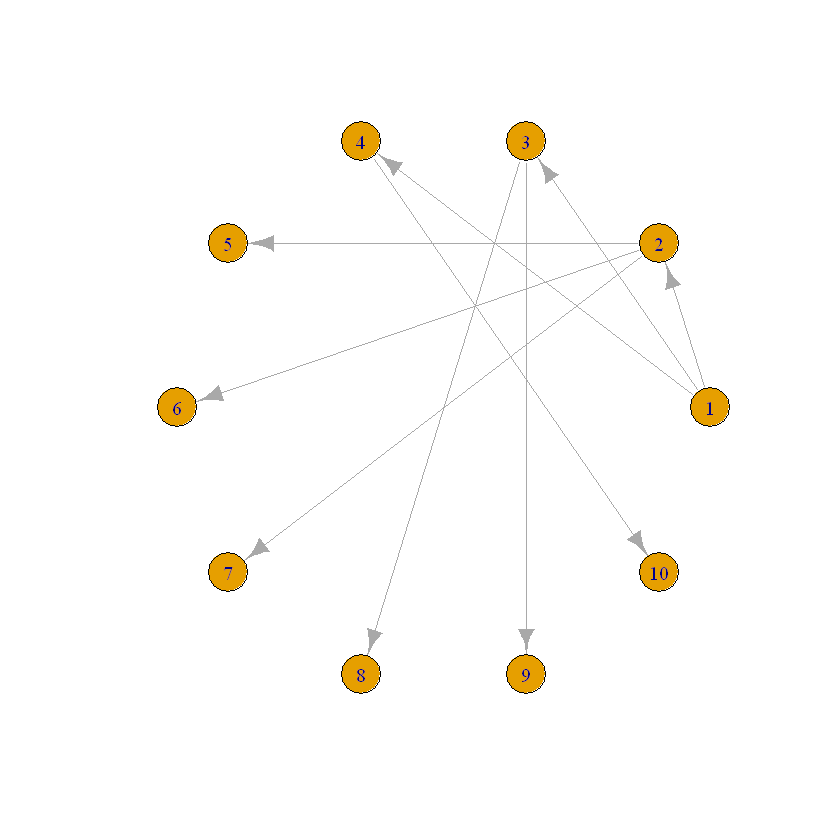

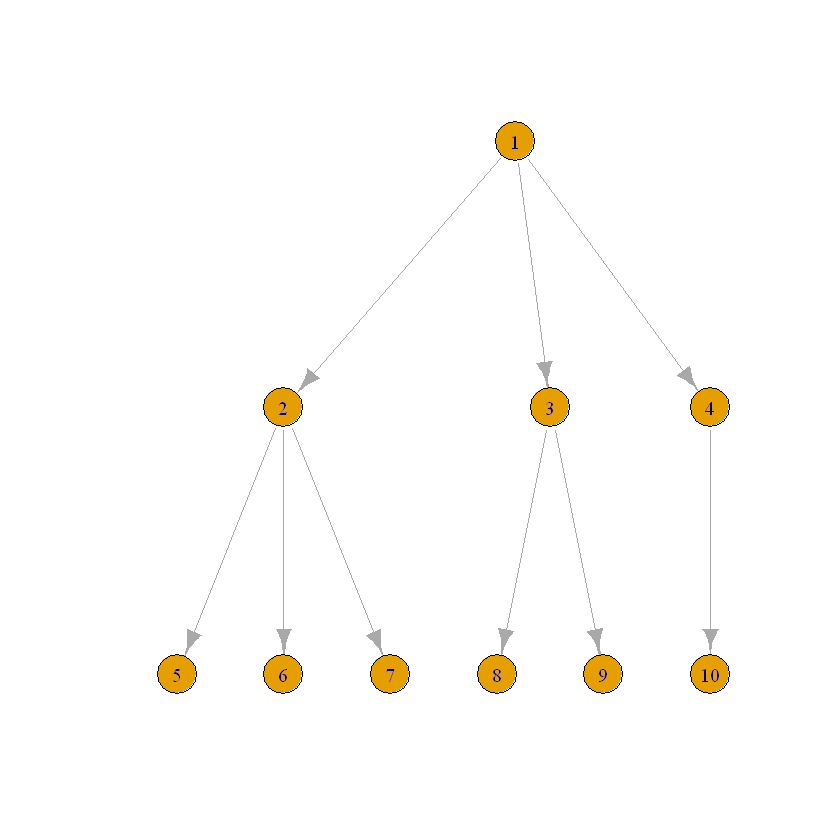

In [12]:
red6 <- graph.formula(1-+2,1-+3,1-+4,2-+5,2-+6,2-+7,3-+8,3-+9,4-+10)

l1 <- layout_in_circle(red6)
l2 <- layout_as_tree(red6)
plot(red6, layout = l1)
plot(red6, layout = l2)

Observamos que en la representación circular no se aprecia la estructura de árbol que tiene la red.

**Ejemplo** *Force-Directed*

Para redes con gran cantidad de nodos y enlaces, las representaciones force-directed son las más útiles. Los algoritmos force-directed consideran los nodos como particulas cargadas y los enlaces como resortes, después de ciertas iteraciones sobre el tiempo el resultado es de una representación visual con los nodos colocados en la posición más "relajada".

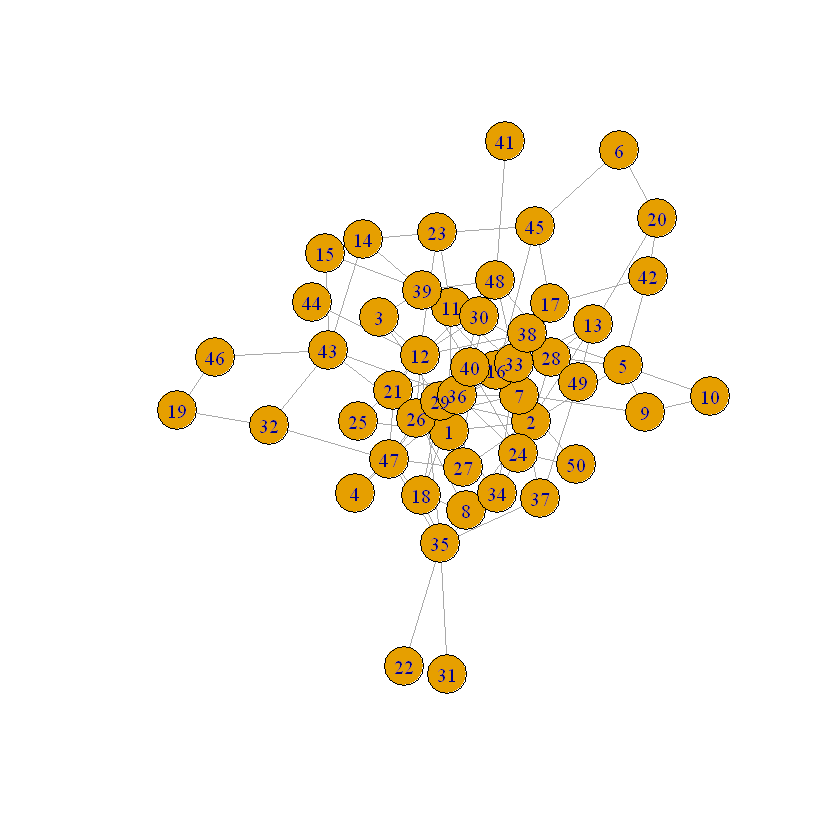

In [13]:
A  <- matrix(c(sample(0:1,2500,prob = c(0.95,0.05),replace=T)), nrow=50, ncol=50)

red7 <- graph_from_adjacency_matrix(A, weighted = 'FALSE', mode = 'undirected' , diag = FALSE)
l <- layout_with_fr(red7)
plot(red7, layout = l)

Las representaciones force-directed nos permiten ver comunidades y subredes que puedan estar presentes en la red.

## Comunidades y subredes

igraph tiene varios algoritmos para detectar comunidades (clústers) y subredes presentes es una red. Para más información de estos algoritmos ver las referencias [2, 7]

**Ejemplo** *Cluster walktrap*

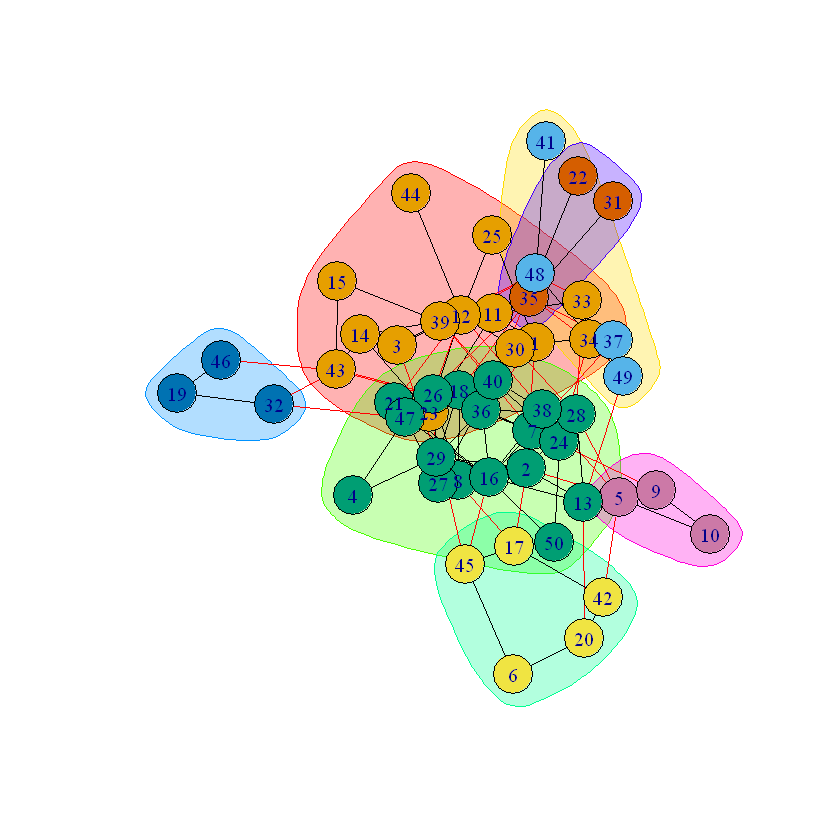

In [14]:
wc <- cluster_walktrap(red7)
plot(wc, red7)

Podemos también colorear los nodos de acuerdo a su comunidad.

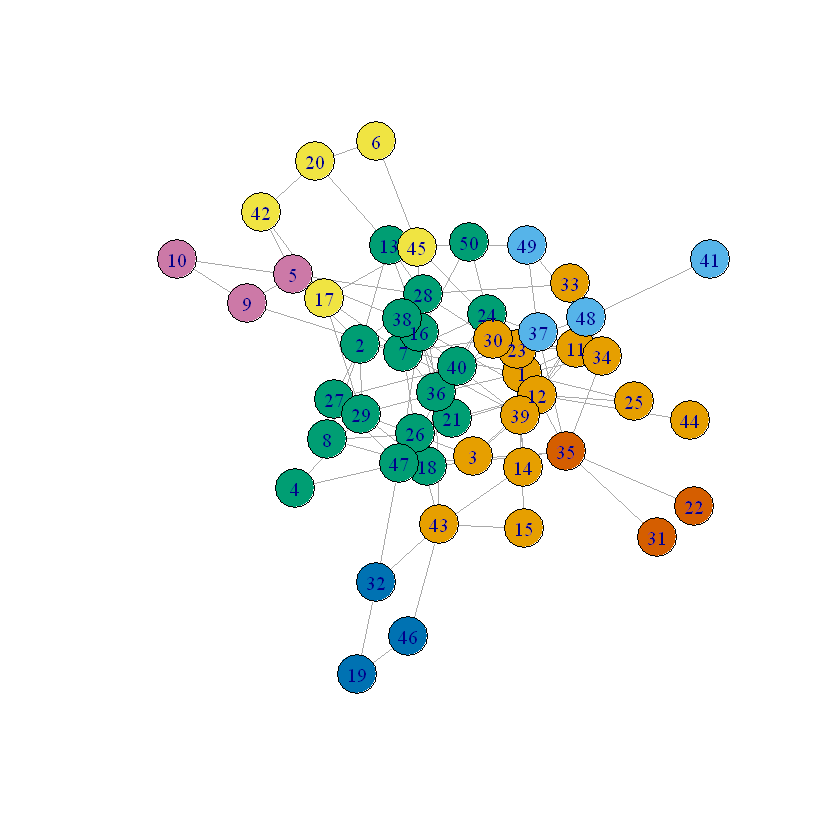

In [15]:
members <- membership(wc)
plot(red7, vertex.color=members)

# Referencias

[1] Dieter Jungnickel. (2008). Graphs, Networks and Algorithms. Germany: Springer.

[2] Douglas A. Luke. (2015). A User’s Guide to Network Analysis in R. Switzerland: Springer.

[3] Eric D. Kolaczyk, Gábor Csárdi. (2014). Statistical Analysis of Network Data with R. New York: Springer.

[4] Mohammed Zuhair Al-Taie, Seifedine Kadry. (2017). Python for Graph and Network Analysis. Switzerland: Springer.

[5] https://igraph.org/

[6] https://igraph.org/r/doc/graph_from_adjacency_matrix.html

[7] https://kateto.net/netscix2016.html